Problem 1: Maximum Likelihood Estimation (MLE)

(a)
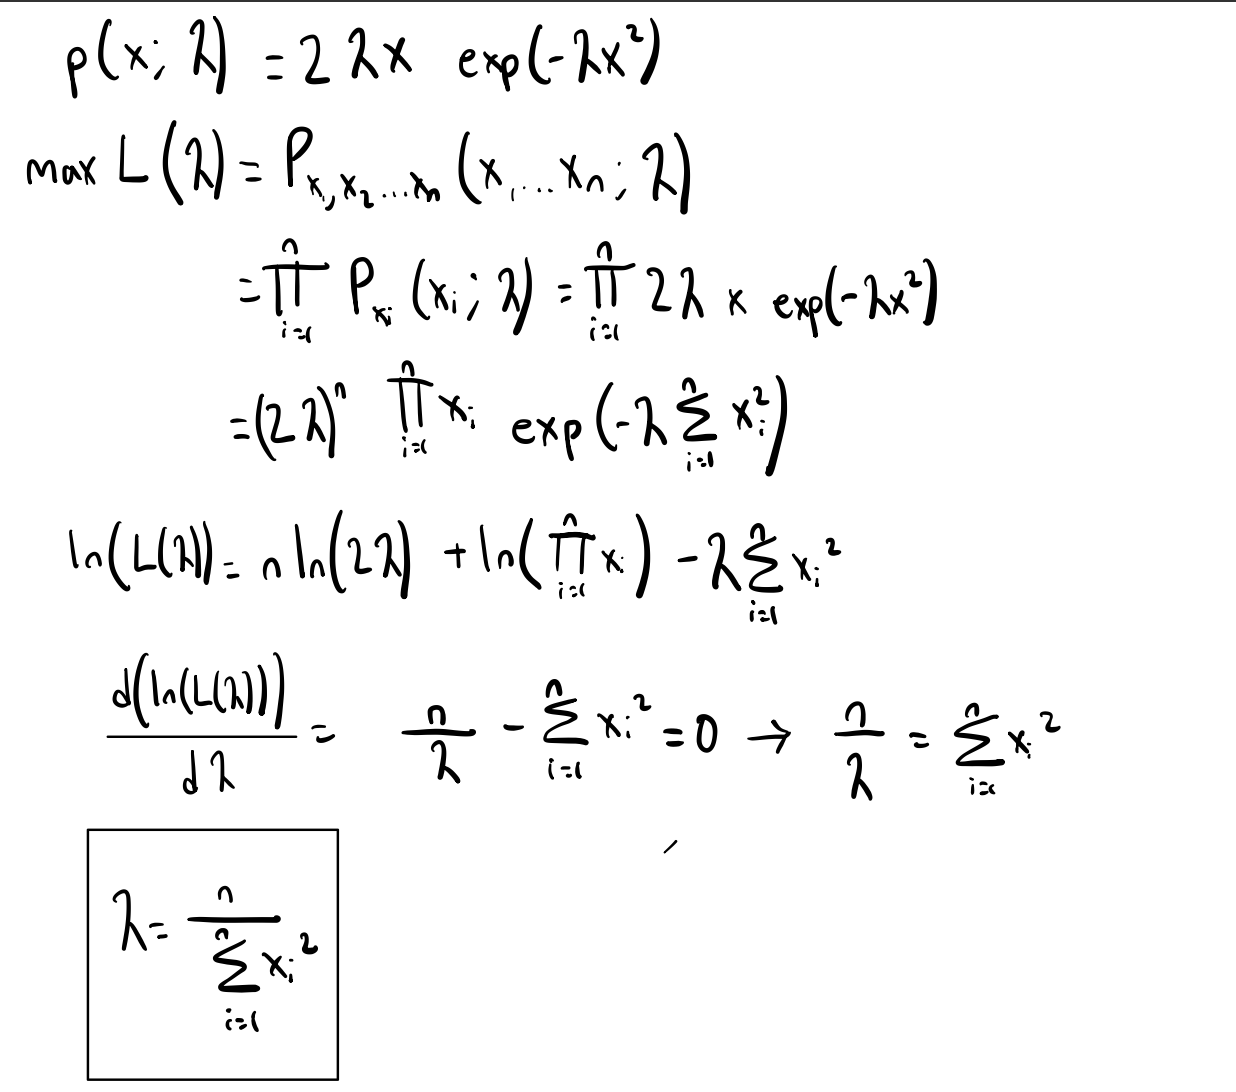

(b)

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

traffic_data = pd.read_csv("Data-ps2/traffic.csv", header = None) # reading file 

print(traffic_data)
traffic_values = traffic_data[0]

def traffic_MLE():
    n = 0 #number of values n 
    sum = 0 #summation
    for x in range(len(traffic_values)):
        sum+=(x**2)
        n+=1
    return n/sum
print(traffic_MLE())



             0
0     0.565706
1     1.030801
2     0.719174
3     0.970237
4     0.940219
...        ...
9995  0.520613
9996  0.761953
9997  1.112560
9998  0.065503
9999  0.627667

[10000 rows x 1 columns]
3.000450052505626e-08


(c)

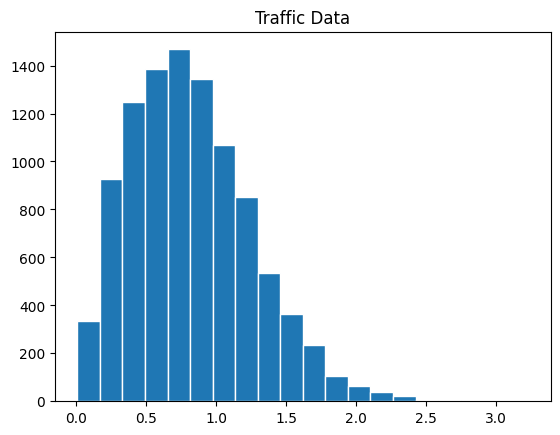

In [9]:

traffic_values.hist(grid = False, bins = 20,edgecolor = "white")
plt.title("Traffic Data")


def MLE_function(x):
    lam = traffic_MLE()
    return (2*lam *x * np.exp(-1*lam * (x**2)))


Text(0.5, 1.0, 'MLE function')

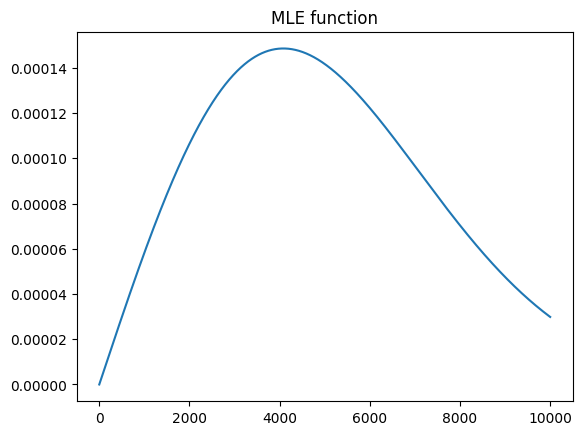

In [10]:
def MLE_function(x):
    return (2*traffic_MLE() *x * np.exp(-1*traffic_MLE() * (x**2)))
x = np.linspace(0, 10000, 10000)

plt.plot(x,MLE_function(x))
plt.title("MLE function")

Findings- The MLE function does a decent job of plotting an accurate distribution of the traffic data points

Problem 3: K-means

In [194]:
kmeans_df = pd.read_csv("Data-ps2/2D_data.txt" , header = None, delimiter=r"\s+")
kmeans_df = pd.DataFrame(kmeans_df)
kmeans_df.columns = ['X', 'Y']

print(len(kmeans_df.columns))
print(kmeans_df)

2
           X         Y
0   1.043663  1.483404
1   1.734390  3.182709
2   1.202952  1.305265
3   3.352556  3.309276
4   1.025740  2.248754
..       ...       ...
95  0.303323 -0.098668
96  1.419543 -0.769057
97  0.647652 -0.493660
98  1.275093 -1.807427
99  1.839627 -0.795114

[100 rows x 2 columns]


Text(0.5, 1.0, 'Unclustered Data')

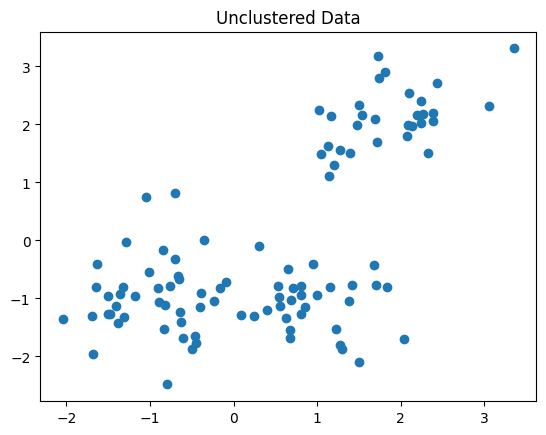

In [195]:
# prompts to enter a k-value to generate k-clusters
x_values = kmeans_df['X'] 
y_values = kmeans_df['Y']

plt.scatter(x_values, y_values)
plt.title("Unclustered Data")

In [196]:
k = 2 #number of clusters


def kmeans(k):
    numFeatures = 2 #for this dataset x and y 
    centroids = get_random_centroids(data, k) #generates k number of random centroids

    iterations = 0
    old_centroids = None 

    #loop exits when should_stop return True
    while not should_stop(old_centroids, centroids, iterations):
        
        iterations += 1
        old_centroids = centroids
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(centroids)
        
        # Assign centroids based on datapoint labels
        centroids = new_centroids(labels, k)
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids


In [272]:
# generates k number of random centroids from given data frame
def get_random_centroids(k):
    return np.array(kmeans_df.sample(n=k))

print(get_random_centroids(3))

[[-1.6486578  -0.81093932]
 [-0.7048284   0.81663258]
 [ 1.0436634   1.4834042 ]]


In [225]:
# returns true if the data is clustered or has exceeded the maximum num of iterations o/w returns false
def should_stop(old_centroids, centroids, iterations):
    if iterations > 10:
        return True
    else:
        return old_centroids == centroids 
    

In [226]:
#helper method to calculate the euclidian distance between a data point and a centroid
def get_distance(data_point,centroid_point):
    return np.sqrt((np.sum(data_point-centroid_point)**2))

In [258]:
#creates a list
def get_labels(centroids):
    labels  = []
    
    for index, row in kmeans_df.iterrows():
        distance = [get_distance(np.array(row), centroid) for centroid in np.array(centroids)]
        labels.append(np.argmin(distance))

    return labels

centroids = get_random_centroids(4)
print(get_labels(centroids))


    

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 1, 3, 1, 1, 1, 2, 3, 1, 3, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3]


In [271]:
def new_centroids(labels, k):
    df = kmeans_df.copy()
    df['labels'] = labels
    
    centroids = pd.DataFrame()
    for value in range(k):
        mean_x  = df.loc[df['labels']== value, 'X'].mean()
        mean_y  = df.loc[df['labels']== value, 'Y'].mean()
        centroids[value] = [mean_x,mean_y]
        
    print(np.array(centroids).T)
    
    
centroids = get_random_centroids(3)
labels = get_labels(centroids)
new_centroids(labels,3)

[[-0.99971308 -1.16247848]
 [ 1.44212345  0.97347914]
 [ 0.45480394 -1.21530552]]
